In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

In [5]:
print("Training Data")
print(train_df.head())

print("\nTest Data")
print(test_df.head())


Training Data
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suit

In [7]:
def preprocess_data(df):
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])
    df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

    cat_cols = ['merchant', 'category', 'gender', 'city', 'state', 'job']
    for i in cat_cols:
        l = LabelEncoder()
        df[i] = l.fit_transform(df[i])
    
    df = df.drop(['first', 'last', 'street', 'trans_num', 'unix_time', 'dob', 'trans_date_trans_time'], axis=1)
    
    return df

In [9]:
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

In [11]:
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

In [13]:
l = LogisticRegression(max_iter=1000)
l.fit(X_train, y_train)
l_predictions = l.predict(X_test)

C:\Users\91704\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
d = DecisionTreeClassifier()
d.fit(X_train, y_train)
d_predictions = d.predict(X_test)

In [17]:
r = RandomForestClassifier()
r.fit(X_train, y_train)
r_predictions = r.predict(X_test)

In [19]:
print("Logistic Regression")
print(classification_report(y_test, l_predictions))
print(confusion_matrix(y_test, l_predictions))
print(f"Accuracy: {accuracy_score(y_test, l_predictions)}\n")

Logistic Regression


C:\Users\91704\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91704\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91704\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

[[553574      0]
 [  2145      0]]
Accuracy: 0.9961401355721147



In [21]:
print("Random Forest")
print(classification_report(y_test, r_predictions))
print(confusion_matrix(y_test, r_predictions))
print(f"Accuracy: {accuracy_score(y_test, r_predictions)}\n")

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.82      0.54      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.77      0.83    555719
weighted avg       1.00      1.00      1.00    555719

[[553324    250]
 [   983   1162]]
Accuracy: 0.9977812527554394



In [23]:
print("Decision Tree")
print(classification_report(y_test, d_predictions))
print(confusion_matrix(y_test, d_predictions))
print(f"Accuracy: {accuracy_score(y_test, d_predictions)}\n")


Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.53      0.60      0.56      2145

    accuracy                           1.00    555719
   macro avg       0.76      0.80      0.78    555719
weighted avg       1.00      1.00      1.00    555719

[[552423   1151]
 [   867   1278]]
Accuracy: 0.996368668337775



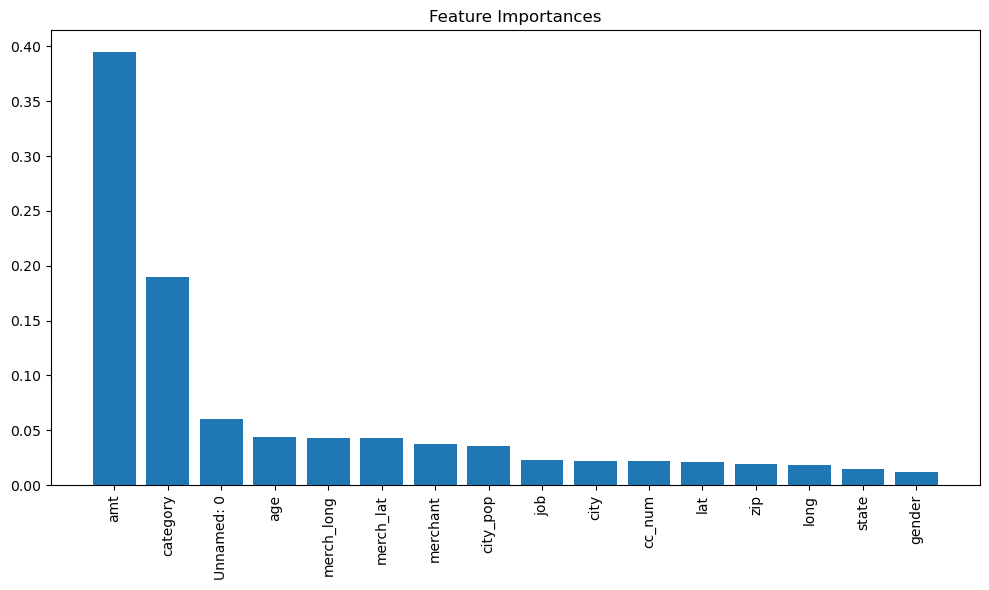

In [27]:
features = X_train.columns
imp = r.feature_importances_
ind = np.argsort(imp)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), imp[ind], align="center")
plt.xticks(range(X_train.shape[1]), features[ind], rotation=90)
plt.tight_layout()
plt.show()
